<a href="https://colab.research.google.com/github/Kraw-ller/Cifar-10-CNN-Model/blob/main/Cifar10_Wameedh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 16s 0us/step


In [3]:
# Checking the number of rows (records) and columns (features)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# Checking the number of unique classes 
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [5]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

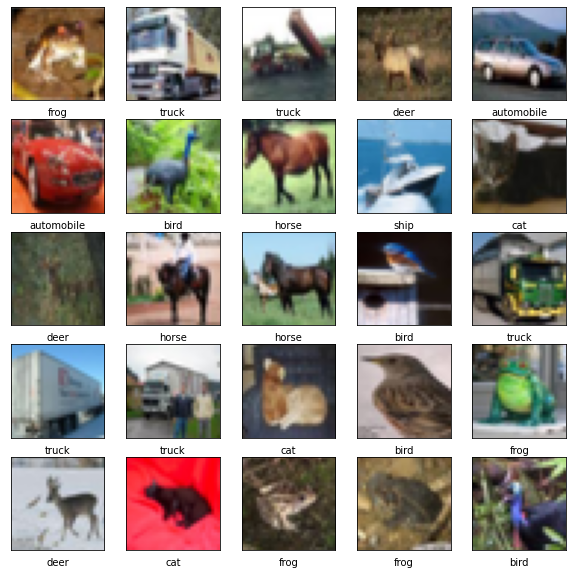

In [6]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [7]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 

# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [8]:
# Creating a sequential model and adding layers to it

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [9]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [15]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=25,
                    validation_data=(test_images, test_labels))

Epoch 1/25
782/782 [==============================] - 10s 13ms/step - loss: 0.5850 - accuracy: 0.8004 - val_loss: 0.5410 - val_accuracy: 0.8132
Epoch 2/25
782/782 [==============================] - 11s 14ms/step - loss: 0.5550 - accuracy: 0.8101 - val_loss: 0.5155 - val_accuracy: 0.8247
Epoch 3/25
782/782 [==============================] - 11s 13ms/step - loss: 0.5275 - accuracy: 0.8182 - val_loss: 0.5680 - val_accuracy: 0.8105
Epoch 4/25
782/782 [==============================] - 10s 13ms/step - loss: 0.5083 - accuracy: 0.8266 - val_loss: 0.5075 - val_accuracy: 0.8286
Epoch 5/25
782/782 [==============================] - 10s 13ms/step - loss: 0.4917 - accuracy: 0.8303 - val_loss: 0.4845 - val_accuracy: 0.8391
Epoch 6/25
782/782 [==============================] - 10s 13ms/step - loss: 0.4742 - accuracy: 0.8389 - val_loss: 0.4774 - val_accuracy: 0.8384
Epoch 7/25
782/782 [==============================] - 10s 13ms/step - loss: 0.4545 - accuracy: 0.8449 - val_loss: 0.4727 - val_accuracy:

Text(0.5, 1.0, 'Loss Curves')

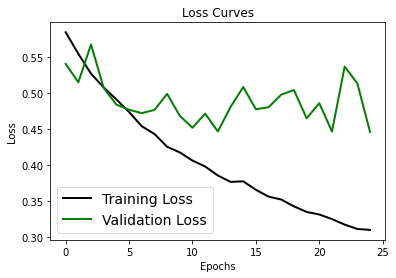

In [16]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

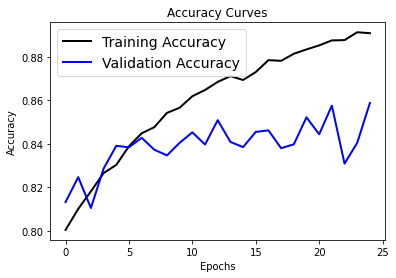

In [17]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [18]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 1s 3ms/step
[[1.8791347e-05 2.8165443e-05 1.2380144e-04 ... 4.6093146e-06
  2.1410064e-05 5.5940027e-06]
 [1.1182677e-06 1.1388556e-02 3.9685735e-09 ... 6.5154082e-10
  9.8860884e-01 1.4434219e-06]
 [3.8652637e-04 5.6222156e-02 5.8138332e-05 ... 2.8502993e-05
  9.4206262e-01 1.6040466e-04]
 ...
 [2.7783727e-07 2.1869344e-07 1.1437210e-04 ... 2.2320436e-04
  3.0464966e-07 3.8886435e-07]
 [9.0671565e-05 9.9987590e-01 5.9282723e-07 ... 2.4335012e-07
  2.6231868e-07 2.4427787e-05]
 [8.6245812e-08 9.4372412e-09 2.9967373e-07 ... 9.9957973e-01
  3.3859273e-09 4.4532733e-09]]
[3 8 8 ... 5 1 7]


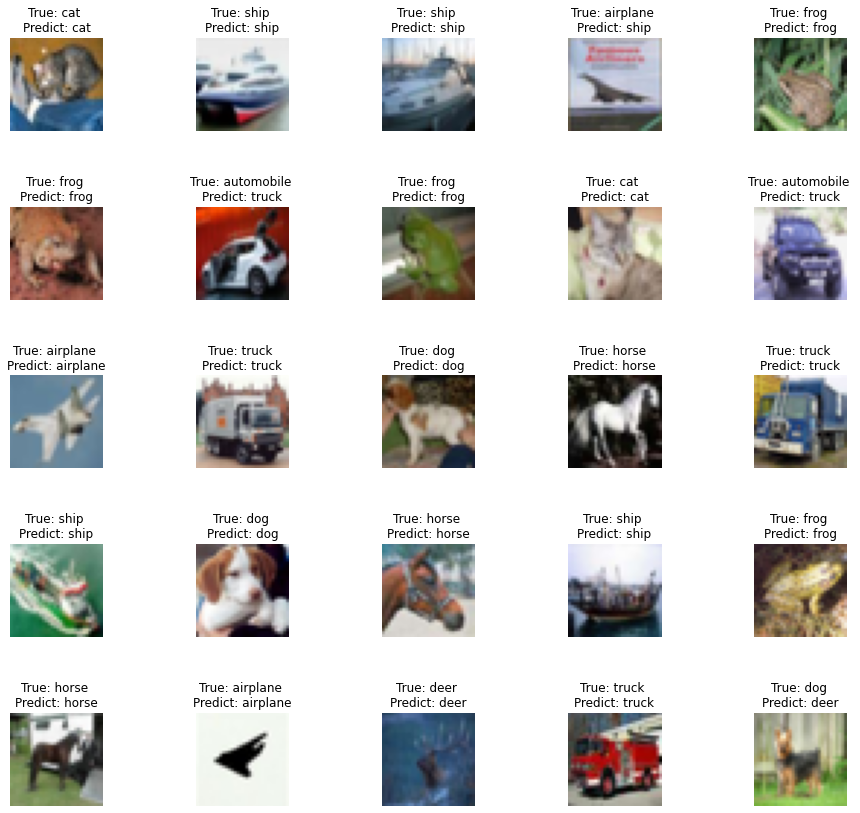

In [19]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)